# Zadanie 1
Co zrobiono 
- stworzenie macierzy bedacej maska filtru gornoprzepustowego
- skorzystanie z funkcji cv.filterd2D aby odfiltrowac obraz

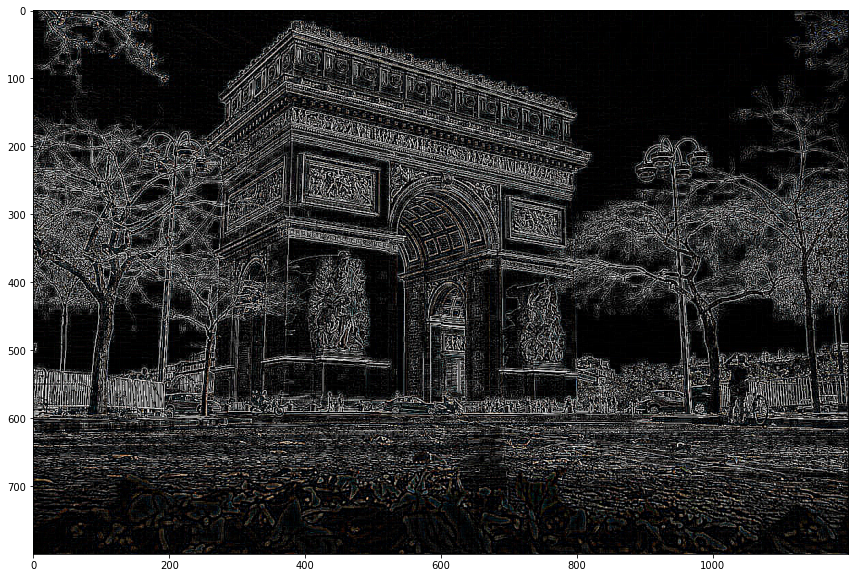

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


# Ustawienie rozmarów wyświetlanych obrazów
plt.rcParams["figure.figsize"] = (18, 10)
# odczyt obrazu
image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
# filtr gornoprzepustowy
kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
]
kernel = np.asarray(kernel)
# zastosowanie filtra
filtered_image = cv.filter2D(image, -1, kernel=kernel) 

plt.imshow(filtered_image)


# Zadanie 2
Co zrobiono
- konwersja danych obrazka na typ float 32, po czym przeskalowanie wartosci do przedzialu (0-1)
- Stworzenie macierzy przeksztalcen tj w prezentacji.
- przeprowadzenie mnozenia macierzy na wektorach RGB obrazu
- Po przeprowadzeniu obliczen skorzystano z funkcji numpy.clip aby przyciac wartosci wieksze od 1 do 1.
- wydruk obrazu przed zmiana i po zmianie

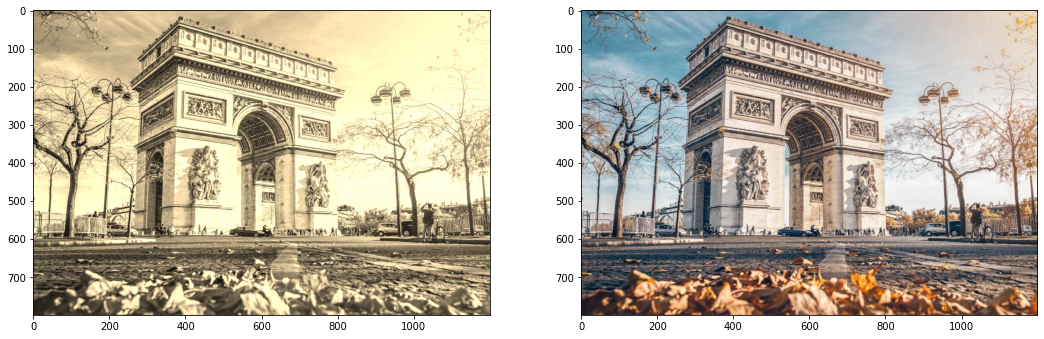

In [2]:

        
            




# konwersja na float'a by dzialac na liczbach z przedzialu 0 - 1 zamiast na 

image_as_float = np.array(image, dtype='float32')
image_as_float /= 255

RGB_NEW = []

RGB_matrix = np.array(
    [
        [0.393, 0.769, 0.189],
        [0.349, 0.689, 0.168],
        [0.272, 0.534, 0.131],
    ]
)
# wyliczanie wartosci 
for row in image_as_float:
    for column in row:
        new_col = RGB_matrix.dot(column)
        column[0] = new_col[0]
        column[1] = new_col[1]
        column[2] = new_col[2]
image_as_float = np.clip(image_as_float, 0, 1)
        


# wyswietlenie dwoch obrazkow celem porownania :) 
fig = plt.figure(figsize = (18, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image_as_float)
fig.add_subplot(1, 2, 2)
plt.imshow(image)


# Zadanie 3
Co zrobiono:
- Stworzenie macierzy YCbCr 
- konwersja obrazka na format uint8
- skorzystanie z z funkcji numpy.dot() do przeprowadzenia mnozenia macierzxwektor
- przyciecie wartosci za pomoca clipa by liczby byly w przedziale 0 - 255
- wydruk obrazkow : oryginal, przerobiony przez YCbCr, konwersja powrotna i kanaly Y, Cb, Cr

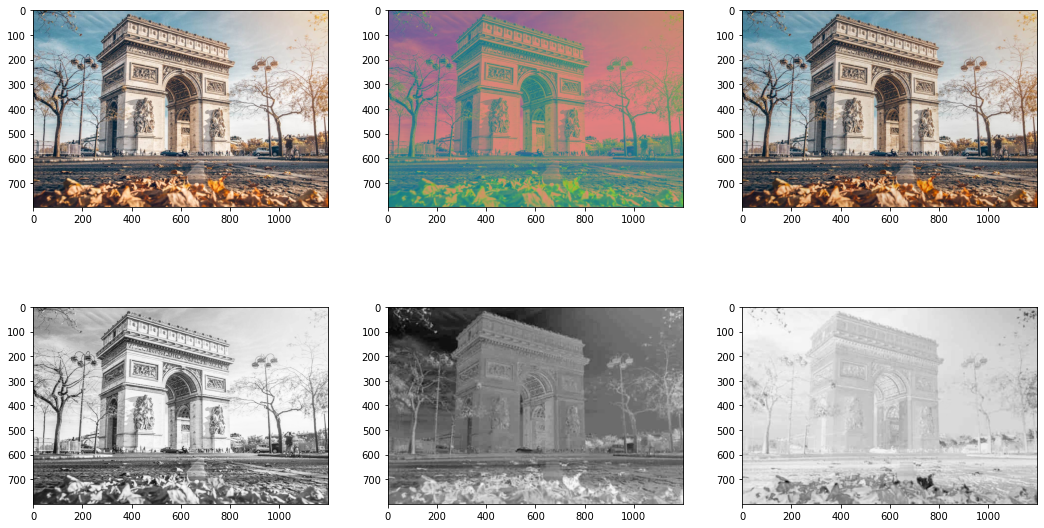

In [3]:

vcb_matrix = np.array(
    [
        [0.229, 0.587, 0.114],
        [0.500, -0.418, -0.082],
        [-0.168, -0.331, 0.500],
    ]
)
image_as_uint = np.array(image, dtype="uint8")

for row in image_as_uint:
    for column in row:
        new_col = vcb_matrix.dot(column)
        column[0] = new_col[0]
        column[1] = new_col[1] +128
        column[2] = new_col[2] +128
image_as_uint = np.clip(image_as_uint, 0, 255)

rollback_img = cv.cvtColor(image_as_uint, cv.COLOR_YCrCb2RGB)



fig = plt.figure(figsize = (18, 10))
fig.add_subplot(2, 3, 1)
plt.imshow(image)
fig.add_subplot(2, 3, 2)
plt.imshow(image_as_uint)
fig.add_subplot(2, 3, 3)
plt.imshow(rollback_img)

fig.add_subplot(2, 3, 4)
plt.imshow(image_as_uint[:,:,0], cmap="Greys_r")
fig.add_subplot(2, 3, 5)
plt.imshow(image_as_uint[:,:,1], cmap="Greys_r")
fig.add_subplot(2, 3, 6)
plt.imshow(image_as_uint[:,:,2], cmap="Greys_r")

# Zadanie 4
Co zrobiono:
- przeprowadzenie downsamplingu i upsamplingu na kopii obrazka przekonwertowanego do formatu YCbCr 
- Wyswietlenie poszczegolnych skladowych i skonwertowanego obrazka 

[[150 150 149 ...  92 106 106]
 [150 150 149 ...  92 106 106]
 [149 149 148 ...  83  94  94]
 ...
 [131 131 131 ...  93  90  90]
 [131 131 131 ... 100  98  98]
 [131 131 131 ... 100  98  98]]


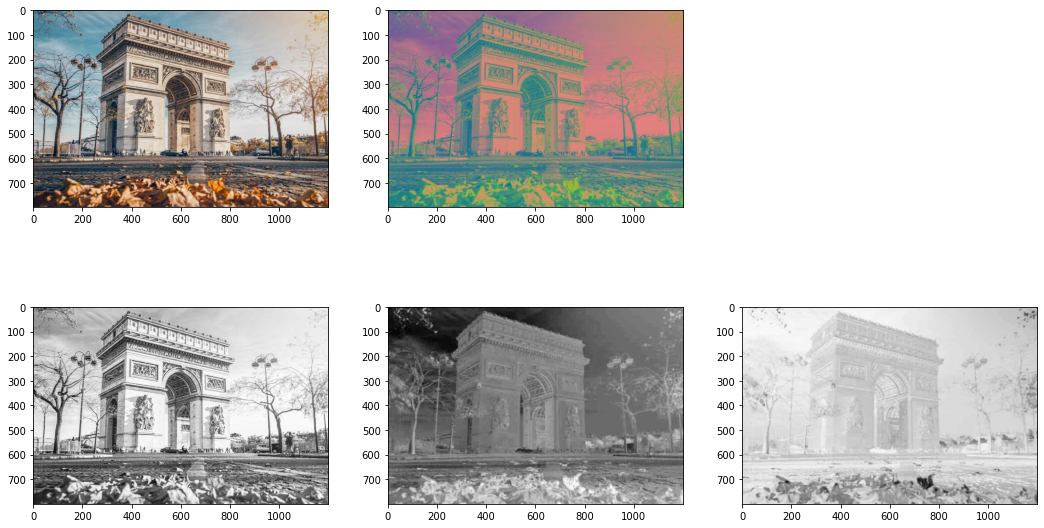

In [13]:
image_DVB = image_as_uint.copy()

rows, columns, dim = image_DVB.shape


# downsampling
CR = image_DVB[0::2,0::2,1]
CB = image_DVB[0::2,0::2,2]

cr_rows, cr_cols = CR.shape

#print(cr_rows, rows)

#  x,y   | x+1,y
#   ----------
#  x,y+1 | x+1,y+1
#


# upsampling
for row in range(0, cr_rows ):
    for column in range(0, cr_cols):
        image_DVB[2*row+1, 2*column, 1] = CR[row, column]
        image_DVB[2*row+1, 2*column, 2] = CB[row, column]

        image_DVB[2*row, 2*column+1, 1] = CR[row, column]
        image_DVB[2*row, 2*column+1, 2] = CB[row, column]
        
        image_DVB[2*row+1, 2*column+1, 1] = CR[row, column]
        image_DVB[2*row+1, 2*column+1, 2] = CB[row, column]

print(image_DVB[:,:,2])
# for row in range(0, rows, 2):
#     for column in range(0, columns, 2):
#         Cr = image_DVB[row, column, 1]
#         Cb = image_DVB[row, column, 2]

        
#         if row + 1< rows:
#             image_DVB[row+1 , column, 1] = Cr
#             image_DVB[row+1 , column, 2] = Cb
#             if column + 1 < columns:
#                 image_DVB[row+1 , column+1, 1] = Cr
#                 image_DVB[row+1 , column+1, 2] = Cb
#         if column + 1 < columns:
#                 image_DVB[row , column+1, 1] = Cr
#                 image_DVB[row , column+1, 2] = Cb

                
converted_image = cv.cvtColor(image_DVB, cv.COLOR_YCrCb2RGB)


fig = plt.figure(figsize = (18, 10))
fig.add_subplot(2, 3, 1)
plt.imshow(converted_image)
fig.add_subplot(2, 3, 2)
plt.imshow(image_DVB)

fig.add_subplot(2, 3, 4)
plt.imshow(image_DVB[:,:,0], cmap="Greys_r")
fig.add_subplot(2, 3, 5)
plt.imshow(image_DVB[:,:,1], cmap="Greys_r")
fig.add_subplot(2, 3, 6)
plt.imshow(image_DVB[:,:,2], cmap="Greys_r")


# Zadanie 5
Tutaj nie jestem pewien czy mamy obliczyc MSE tylko dla calosci czy tez dla poszczegolnych kanalow

In [10]:
error = ((rollback_img.astype(np.int64) - converted_image.astype(np.int64))**2).mean(axis=None)

print("MSE_RGB " + str(error))
# rollback_img.astype(np.int64)
# converted_image.astype(np.int64)

MSE_RGB 4.422829513888889


array([[[ 59, 117, 141],
        [ 58, 116, 140],
        [ 56, 112, 135],
        ...,
        [233, 201, 140],
        [219, 216, 173],
        [217, 214, 171]],

       [[ 63, 121, 145],
        [ 62, 120, 144],
        [ 62, 118, 141],
        ...,
        [215, 183, 122],
        [208, 205, 162],
        [217, 214, 171]],

       [[ 62, 120, 142],
        [ 63, 121, 143],
        [ 63, 121, 141],
        ...,
        [210, 168,  92],
        [209, 193, 131],
        [228, 212, 150]],

       ...,

       [[ 28,  29,  34],
        [ 28,  29,  34],
        [ 28,  29,  34],
        ...,
        [128,  49,   6],
        [131,  51,   2],
        [132,  52,   3]],

       [[ 28,  29,  34],
        [ 28,  29,  34],
        [ 28,  29,  34],
        ...,
        [118,  48,  15],
        [120,  46,  11],
        [120,  46,  11]],

       [[ 28,  29,  34],
        [ 28,  29,  34],
        [ 28,  29,  34],
        ...,
        [120,  50,  17],
        [120,  46,  11],
        [119,  45,  10]]